In [1]:
import pandas as pd
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np
#Set Data folder
date = "2024_12_02"
folder = "C:/Users/skiang/OneDrive - Rice University/Research/LVAD Sensing/WindowsLaptop/Processing/Data_"+date+"/"


#Read in Data

def read_csv (Condition,HR,DATE,PATH):
    dfData=pd.read_csv(PATH + DATE + '_' + Condition + '_' + HR +'.csv')
    dfData.drop('Unnamed: 0',axis = 1,inplace=True)
    dfData.RPM = -dfData.RPM
    dfData.Current = -dfData.Current
    return dfData

#Define Classes

class Healthy:
    def __init__(self):
        self.BPM60 = []
        self.BPM80 = []
class MHF:
    def __init__(self):
        self.BPM60 = []
        self.BPM80 = []
class SHF:
    def __init__(self):
        self.BPM60 = []
        self.BPM80 = []




Healthy.BPM60 = read_csv('Healthy','60BPM',date,folder)
Healthy.BPM80 = read_csv('Healthy','80BPM',date,folder)

MHF.BPM60 = read_csv('MHF','60BPM',date,folder)
MHF.BPM80 = read_csv('MHF','80BPM',date,folder)

SHF.BPM60 = read_csv('SHF','60BPM',date,folder)
SHF.BPM80 = read_csv('SHF','80BPM',date,folder)



#Standardize the size of the arrays (They are all about 5 minutes of data at 30 Samples/second = ~9000 datapoints)
min_len = min(len(Healthy.BPM60),len(Healthy.BPM80),len(MHF.BPM60),len(MHF.BPM80),len(SHF.BPM60),len(SHF.BPM80))

Healthy.BPM60 = Healthy.BPM60[:min_len]
Healthy.BPM80 = Healthy.BPM80[:min_len]

MHF.BPM60 = MHF.BPM60[:min_len]
MHF.BPM80 = MHF.BPM80[:min_len]

SHF.BPM60 = SHF.BPM60[:min_len]
SHF.BPM80 = SHF.BPM80[:min_len]



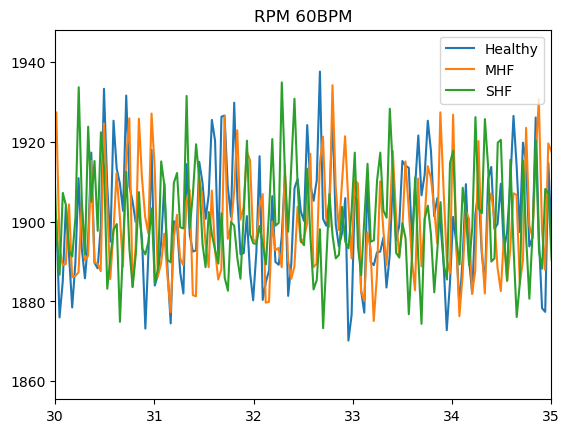

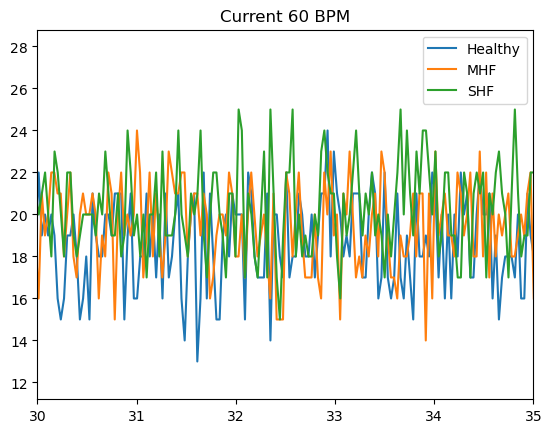

In [2]:
plt.plot(Healthy.BPM60.Time,Healthy.BPM60.RPM,MHF.BPM60.Time,MHF.BPM60.RPM,SHF.BPM60.Time,SHF.BPM60.RPM)
ax = plt.gca()
#ax.set_ylim([1800, 2200])
ax.set_xlim([30, 35])
ax.set_title('RPM 60BPM')
ax.legend(['Healthy','MHF','SHF'])
plt.show()

plt.plot(Healthy.BPM60.Time,Healthy.BPM60.Current,MHF.BPM60.Time,MHF.BPM60.Current,SHF.BPM60.Time,SHF.BPM60.Current)
ax2 = plt.gca()
#ax2.set_ylim([25, 50])
ax2.set_xlim([30, 35])
ax2.set_title('Current 60 BPM')
ax2.legend(['Healthy','MHF','SHF'])
plt.show()

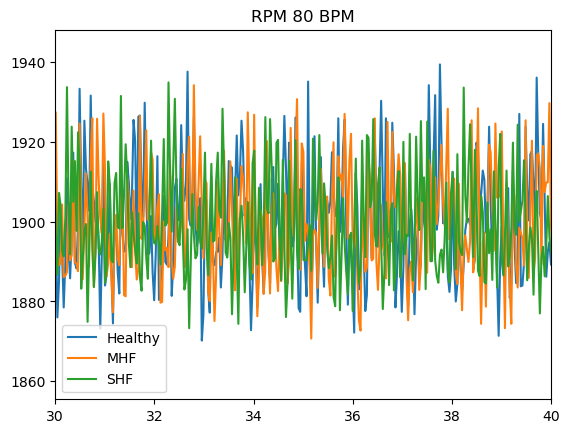

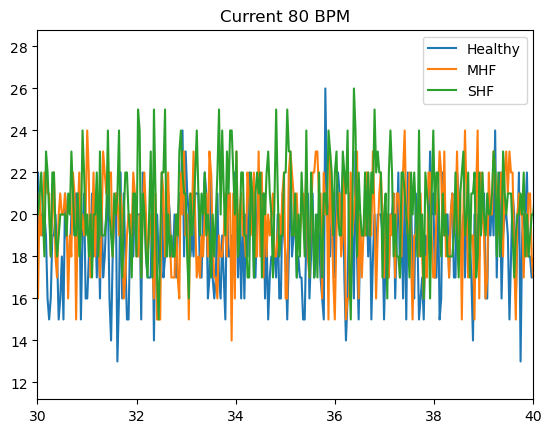

In [3]:
plt.plot(Healthy.BPM60.Time,Healthy.BPM60.RPM,MHF.BPM60.Time,MHF.BPM60.RPM,SHF.BPM60.Time,SHF.BPM60.RPM)
ax = plt.gca()
#ax.set_ylim([1800, 2200])
ax.set_xlim([30, 40])
ax.set_title('RPM 80 BPM')
ax.legend(['Healthy','MHF','SHF'])
plt.show()

plt.plot(Healthy.BPM60.Time,Healthy.BPM60.Current,MHF.BPM60.Time,MHF.BPM60.Current,SHF.BPM60.Time,SHF.BPM60.Current)
ax2 = plt.gca()
#ax2.set_ylim([25, 50])
ax2.set_xlim([30, 40])
ax2.set_title('Current 80 BPM')
ax2.legend(['Healthy','MHF','SHF'])
plt.show()

In [4]:
from scipy.signal import butter, filtfilt


def LPF(rawData): 
    cutoff_freq = np.array([0.2, 2])  # Cutoff frequency in Hz
    fs = len(rawData.Time)/max(rawData.Time)  # Sampling rate in Hz
    order = 4  # Filter order
    
    # Design the low-pass filter
    nyq = 0.5 * fs
    normal_cutoff = cutoff_freq / nyq
    b, a = butter(order, normal_cutoff, btype='band',analog = False)

    # Apply the filter
    filteredDataCurrent = filtfilt(b, a, rawData.Current)
    filteredDataRPM = filtfilt(b, a, rawData.RPM)
    return [filteredDataCurrent, filteredDataRPM] 



'''

[CURRENT, RPM] = LPF(Healthy.BPM60)

t = Healthy.BPM60.Time


# Plot the original and filtered data
plt.figure(figsize=(10, 6))

plt.plot(t, Healthy.BPM60.Current, label='Original Signal')
plt.plot(t, CURRENT, label='Filtered Signal')
plt.xlim([60,65])
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Current')
plt.legend()
plt.grid(True)

plt.show()

plt.plot(t, Healthy.BPM60.RPM, label='Original Signal')
plt.plot(t, RPM, label='Filtered Signal')
plt.xlim([60,65])
plt.xlabel('Time (s)')
plt.ylabel('Current')
plt.title('Current')
plt.legend()
plt.grid(True)

plt.show()
'''

"\n\n[CURRENT, RPM] = LPF(Healthy.BPM60)\n\nt = Healthy.BPM60.Time\n\n\n# Plot the original and filtered data\nplt.figure(figsize=(10, 6))\n\nplt.plot(t, Healthy.BPM60.Current, label='Original Signal')\nplt.plot(t, CURRENT, label='Filtered Signal')\nplt.xlim([60,65])\nplt.xlabel('Time (s)')\nplt.ylabel('Current (A)')\nplt.title('Current')\nplt.legend()\nplt.grid(True)\n\nplt.show()\n\nplt.plot(t, Healthy.BPM60.RPM, label='Original Signal')\nplt.plot(t, RPM, label='Filtered Signal')\nplt.xlim([60,65])\nplt.xlabel('Time (s)')\nplt.ylabel('Current')\nplt.title('Current')\nplt.legend()\nplt.grid(True)\n\nplt.show()\n"

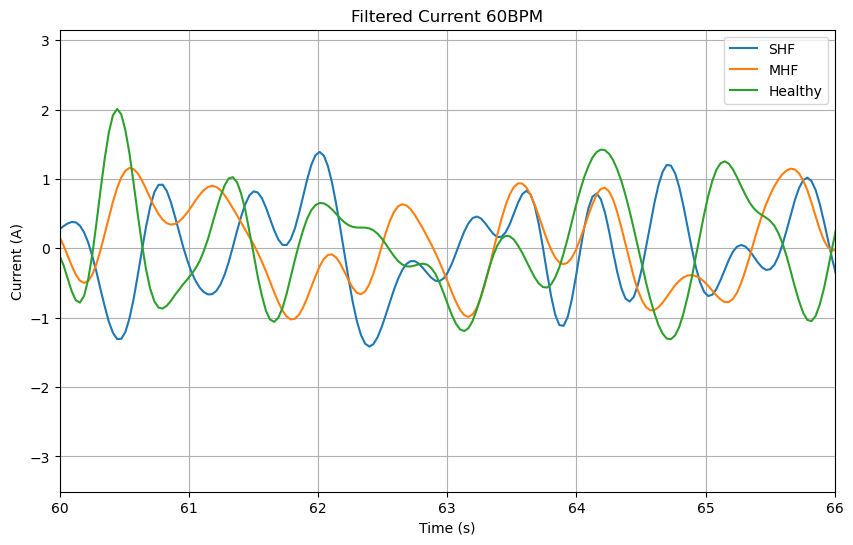

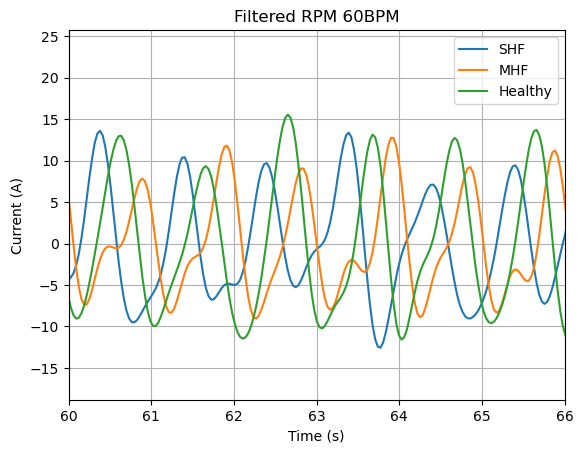

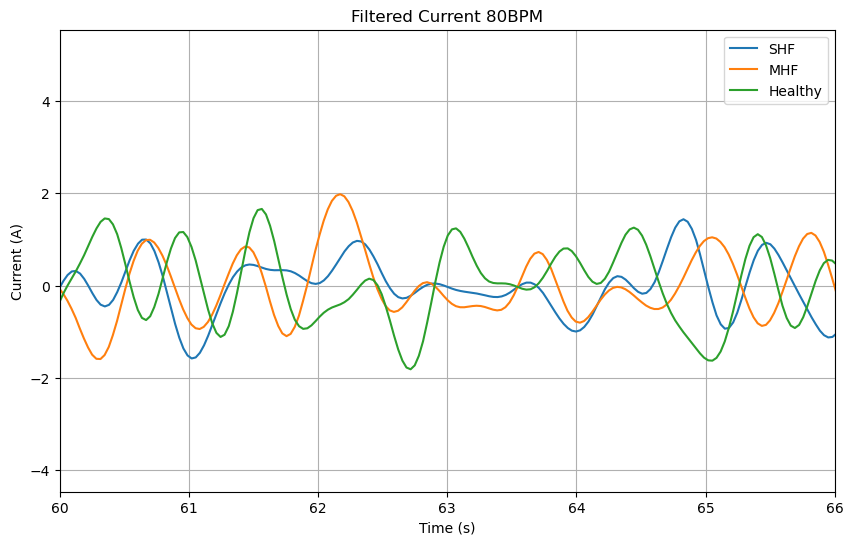

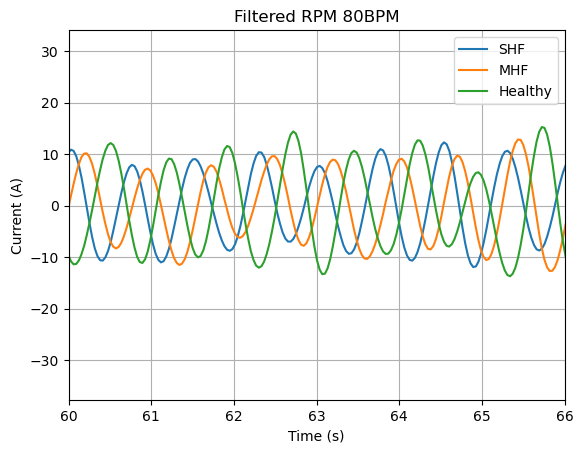

In [5]:


[Healthy.BPM60.Current.Filtered, Healthy.BPM60.RPM.Filtered] = LPF(Healthy.BPM60)
[Healthy.BPM80.Current.Filtered, Healthy.BPM80.RPM.Filtered] = LPF(Healthy.BPM80)

[MHF.BPM60.Current.Filtered, MHF.BPM60.RPM.Filtered] = LPF(MHF.BPM60)
[MHF.BPM80.Current.Filtered, MHF.BPM80.RPM.Filtered] = LPF(MHF.BPM80)

[SHF.BPM60.Current.Filtered, SHF.BPM60.RPM.Filtered] = LPF(SHF.BPM60)
[SHF.BPM80.Current.Filtered, SHF.BPM80.RPM.Filtered] = LPF(SHF.BPM80)


# Plot the filtered data
plt.figure(figsize=(10, 6))

plt.plot(SHF.BPM60.Time, SHF.BPM60.Current.Filtered, label='SHF')
plt.plot(MHF.BPM60.Time, MHF.BPM60.Current.Filtered, label='MHF')
plt.plot(Healthy.BPM60.Time, Healthy.BPM60.Current.Filtered, label='Healthy')

plt.xlim([60,66])
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Filtered Current 60BPM')
plt.legend()
plt.grid(True)

plt.show()


plt.plot(SHF.BPM60.Time, SHF.BPM60.RPM.Filtered, label='SHF')
plt.plot(MHF.BPM60.Time, MHF.BPM60.RPM.Filtered, label='MHF')
plt.plot(Healthy.BPM60.Time, Healthy.BPM60.RPM.Filtered, label='Healthy')

plt.xlim([60,66])
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Filtered RPM 60BPM')
plt.legend()
plt.grid(True)

plt.show()


# Plot the original and filtered data
plt.figure(figsize=(10, 6))

plt.plot(SHF.BPM80.Time, SHF.BPM80.Current.Filtered, label='SHF')
plt.plot(MHF.BPM80.Time, MHF.BPM80.Current.Filtered, label='MHF')
plt.plot(Healthy.BPM80.Time, Healthy.BPM80.Current.Filtered, label='Healthy')

plt.xlim([60,66])
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Filtered Current 80BPM')
plt.legend()
plt.grid(True)

plt.show()


plt.plot(SHF.BPM80.Time, SHF.BPM80.RPM.Filtered, label='SHF')
plt.plot(MHF.BPM80.Time, MHF.BPM80.RPM.Filtered, label='MHF')
plt.plot(Healthy.BPM80.Time, Healthy.BPM80.RPM.Filtered, label='Healthy')

plt.xlim([60,66])
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Filtered RPM 80BPM')
plt.legend()
plt.grid(True)

plt.show()


In [6]:
#Taking the derivative of the filtered values

#RPM
SHFGradientRPM60 = np.gradient(SHF.BPM60.RPM.Filtered, SHF.BPM60.Time)
MHFGradientRPM60 = np.gradient(MHF.BPM60.RPM.Filtered, MHF.BPM60.Time)
HealthyGradientRPM60 = np.gradient(Healthy.BPM60.RPM.Filtered, Healthy.BPM60.Time)


SHFGradientRPM80 = np.gradient(SHF.BPM80.RPM.Filtered, SHF.BPM80.Time)
MHFGradientRPM80 = np.gradient(MHF.BPM80.RPM.Filtered, MHF.BPM80.Time)
HealthyGradientRPM80 = np.gradient(Healthy.BPM80.RPM.Filtered, Healthy.BPM80.Time)

#Current
SHFGradientCurrent60 = np.gradient(SHF.BPM60.Current.Filtered, SHF.BPM60.Time)
MHFGradientCurrent60 = np.gradient(MHF.BPM60.Current.Filtered, MHF.BPM60.Time)
HealthyGradientCurrent60 = np.gradient(Healthy.BPM60.Current.Filtered, Healthy.BPM60.Time)


SHFGradientCurrent80 = np.gradient(SHF.BPM80.Current.Filtered, SHF.BPM80.Time)
MHFGradientCurrent80 = np.gradient(MHF.BPM80.Current.Filtered, MHF.BPM80.Time)
HealthyGradientCurrent80 = np.gradient(Healthy.BPM80.Current.Filtered, Healthy.BPM80.Time)

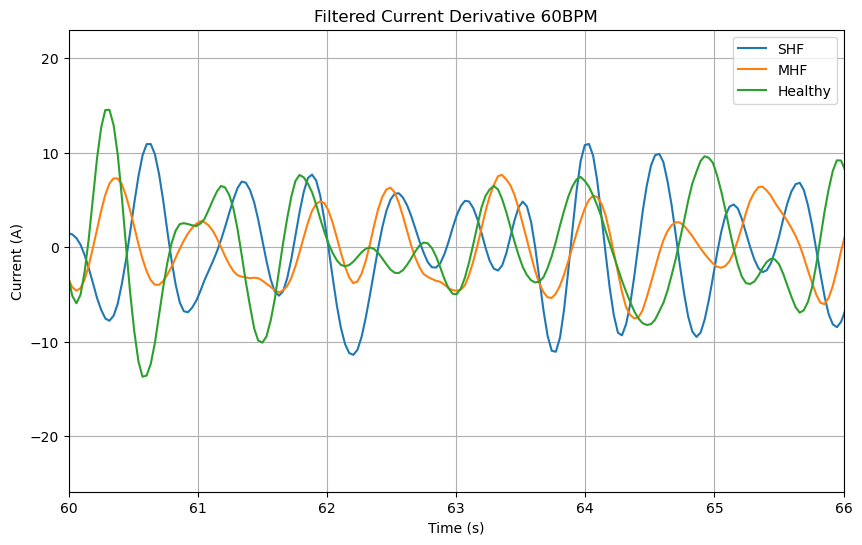

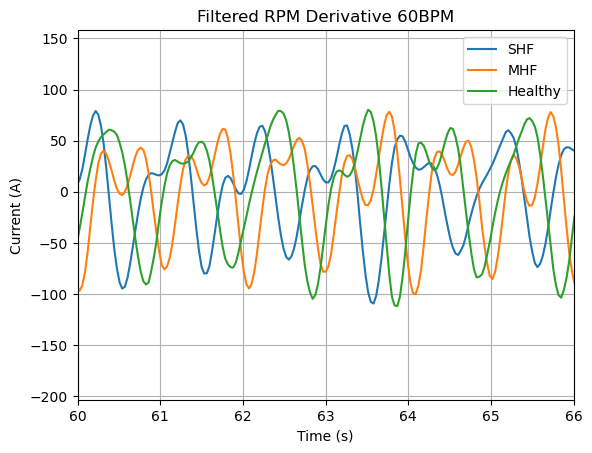

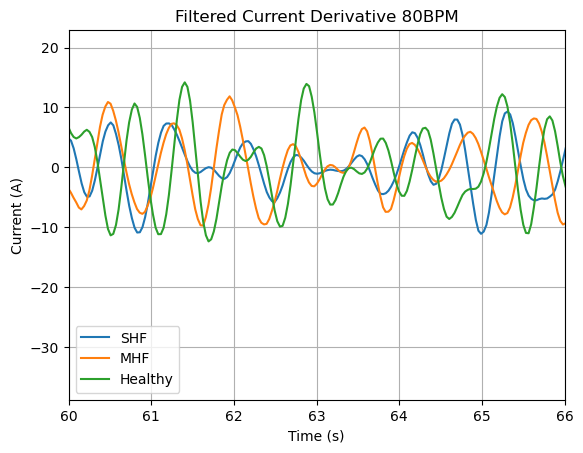

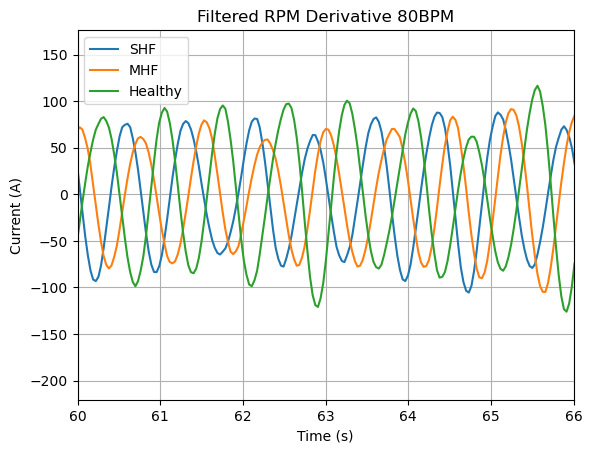

In [7]:
# Plot the gradient of the filtered data
plt.figure(figsize=(10, 6))


#60 BPM

plt.plot(SHF.BPM60.Time, SHFGradientCurrent60, label='SHF')
plt.plot(MHF.BPM60.Time, MHFGradientCurrent60, label='MHF')
plt.plot(Healthy.BPM60.Time, HealthyGradientCurrent60, label='Healthy')

plt.xlim([60,66])
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Filtered Current Derivative 60BPM')
plt.legend()
plt.grid(True)

plt.show()


plt.plot(SHF.BPM60.Time, SHFGradientRPM60, label='SHF')
plt.plot(MHF.BPM60.Time, MHFGradientRPM60, label='MHF')
plt.plot(Healthy.BPM60.Time, HealthyGradientRPM60, label='Healthy')

plt.xlim([60,66])
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Filtered RPM Derivative 60BPM')
plt.legend()
plt.grid(True)

plt.show()


#80 BPM

plt.plot(SHF.BPM80.Time, SHFGradientCurrent80, label='SHF')
plt.plot(MHF.BPM80.Time, MHFGradientCurrent80, label='MHF')
plt.plot(Healthy.BPM80.Time, HealthyGradientCurrent80, label='Healthy')

plt.xlim([60,66])
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Filtered Current Derivative 80BPM')
plt.legend()
plt.grid(True)

plt.show()


plt.plot(SHF.BPM80.Time, SHFGradientRPM80, label='SHF')
plt.plot(MHF.BPM80.Time, MHFGradientRPM80, label='MHF')
plt.plot(Healthy.BPM80.Time, HealthyGradientRPM80, label='Healthy')

plt.xlim([60,66])
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Filtered RPM Derivative 80BPM')
plt.legend()
plt.grid(True)

plt.show()




In [8]:
#Organize the data in dataframes
Data60BPM = {'Time':Healthy.BPM60.Time,
             'Healthy RPM':Healthy.BPM60.RPM,
             'Healthy RPMFiltered':Healthy.BPM60.RPM.Filtered,
             'Healthy RPMFiltered_dydx':HealthyGradientRPM60,
             'Healthy Current':MHF.BPM60.RPM,
             'Healthy CurrentFiltered':Healthy.BPM60.Current,
             'Healthy CurrentFiltered_dydx':HealthyGradientCurrent60,
             
             'MHF RPM':MHF.BPM60.RPM,
             'MHF RPMFiltered':MHF.BPM60.RPM.Filtered,
             'MHF RPMFiltered_dydx':MHFGradientRPM60,
             'MHF Current':MHF.BPM60.RPM,
             'MHF CurrentFiltered':MHF.BPM60.Current,
             'MHF CurrentFiltered_dydx':MHFGradientCurrent60,
             'SHF RPM':SHF.BPM60.RPM,
             'SHF RPMFiltered':SHF.BPM60.RPM.Filtered,
             'SHF RPMFiltered_dydx':SHFGradientRPM60,
             'SHF Current':SHF.BPM60.RPM,
             'SHF CurrentFiltered':SHF.BPM60.Current,
             'SHF CurrentFiltered_dydx':SHFGradientCurrent60
            }

Data80BPM = {'Time':MHF.BPM80.Time,
             'Healthy RPM':Healthy.BPM80.RPM,
             'Healthy RPMFiltered':Healthy.BPM80.RPM.Filtered,
             'Healthy RPMFiltered_dydx':HealthyGradientRPM80,
             'Healthy Current':MHF.BPM80.RPM,
             'Healthy CurrentFiltered':Healthy.BPM80.Current,
             'Healthy CurrentFiltered_dydx':HealthyGradientCurrent80,
             'MHF RPM':MHF.BPM80.RPM,
             'MHF RPMFiltered':MHF.BPM80.RPM.Filtered,
             'MHF RPMFiltered_dydx':MHFGradientRPM80,
             'MHF Current':MHF.BPM80.RPM,
             'MHF CurrentFiltered':MHF.BPM80.Current,
             'MHF CurrentFiltered_dydx':MHFGradientCurrent80,
             'SHF RPM':SHF.BPM80.RPM,
             'SHF RPMFiltered':SHF.BPM80.RPM.Filtered,
             'SHF RPMFiltered_dydx':SHFGradientRPM80,
             'SHF Current':SHF.BPM80.RPM,
             'SHF CurrentFiltered':SHF.BPM80.Current,
             'SHF CurrentFiltered_dydx':SHFGradientCurrent80}

df60BPM = pd.DataFrame(Data60BPM)
df80BPM = pd.DataFrame(Data80BPM)

#print(df60BPM)
#print(df80BPM)

In [9]:
#Split the arrays into chunks
'''
SR = df60BPM['Time'].size/df60BPM['Time'].max()
seconds_per_chunk = 5
samples_per_chunk = round(seconds_per_chunk*SR)
NChunks = round(df60BPM['Time'].size/samples_per_chunk)

ChunkList_df = [df60BPM[i:i+samples_per_chunk] for i in range(0,len(df60BPM),samples_per_chunk)]
'''

def SplitIntoChunks(data,seconds_per_chunk):
    SR = data['Time'].size/data['Time'].max()
    samples_per_chunk = round(seconds_per_chunk*SR)
    #NChunks = round(data['Time'].size/samples_per_chunk)
    ChunkList_df = [data[i:i+samples_per_chunk] for i in range(0,len(df60BPM),samples_per_chunk)]
    return ChunkList_df
    
Data60BPMChunked = SplitIntoChunks(df60BPM,5)
Data80BPMChunked = SplitIntoChunks(df80BPM,5)

#print(Data60BPMChunked[len(Data60BPMChunked)-1])
#print(len(Data60BPMChunked))
#print(Data60BPMChunked[0])

In [10]:
#RMS values of RPM
def rms(array):
    return np.sqrt(np.mean(np.square(array)))

#Function to extract attributes from the chunked data
def AttributeRMS(ChunkedData):
    SHF_RPM_RMS = []
    SHF_Current_RMS = []
    SHF_RPM_dydx_RMS = []
    SHF_Current_dydx_RMS = []
    MHF_RPM_RMS = []
    MHF_Current_RMS = []
    MHF_RPM_dydx_RMS = []
    MHF_Current_dydx_RMS = []
    Healthy_RPM_RMS = []
    Healthy_Current_RMS = []
    Healthy_RPM_dydx_RMS = []
    Healthy_Current_dydx_RMS = []
    
    #NChunks = len(ChunkedData)-1
    for i in range(0,len(ChunkedData)):
        SHF_RPM_RMS.append(rms(ChunkedData[i]['SHF RPMFiltered']))
        SHF_Current_RMS.append(rms(ChunkedData[i]['SHF CurrentFiltered']))
        SHF_RPM_dydx_RMS.append(rms(ChunkedData[i]['SHF RPMFiltered_dydx']))
        SHF_Current_dydx_RMS.append(rms(ChunkedData[i]['SHF CurrentFiltered_dydx']))

        MHF_RPM_RMS.append(rms(ChunkedData[i]['MHF RPMFiltered']))
        MHF_Current_RMS.append(rms(ChunkedData[i]['MHF CurrentFiltered']))
        MHF_RPM_dydx_RMS.append(rms(ChunkedData[i]['MHF RPMFiltered_dydx']))
        MHF_Current_dydx_RMS.append(rms(ChunkedData[i]['MHF CurrentFiltered_dydx']))

        Healthy_RPM_RMS.append(rms(ChunkedData[i]['MHF RPMFiltered']))
        Healthy_Current_RMS.append(rms(ChunkedData[i]['MHF CurrentFiltered']))
        Healthy_RPM_dydx_RMS.append(rms(ChunkedData[i]['MHF RPMFiltered_dydx']))
        Healthy_Current_dydx_RMS.append(rms(ChunkedData[i]['MHF CurrentFiltered_dydx']))


    
    return [SHF_RPM_RMS,
            SHF_Current_RMS,
            SHF_RPM_dydx_RMS,
            SHF_Current_dydx_RMS,
            MHF_RPM_RMS,
            MHF_Current_RMS,
            MHF_RPM_dydx_RMS,
            MHF_Current_dydx_RMS,
            Healthy_RPM_RMS,
            Healthy_Current_RMS,
            Healthy_RPM_dydx_RMS,
            Healthy_Current_dydx_RMS]


[SHF_RPM_RMS60,
 SHF_Current_RMS60,
 SHF_RPM_dydx_RMS60,
 SHF_Current_dydx_RMS60,
 MHF_RPM_RMS60,
 MHF_Current_RMS60,
 MHF_RPM_dydx_RMS60,
 MHF_Current_dydx_RMS60,
 Healthy_RPM_RMS60,
 Healthy_Current_RMS60,
 Healthy_RPM_dydx_RMS60,
 Healthy_Current_dydx_RMS60] = AttributeRMS(Data60BPMChunked)


[SHF_RPM_RMS80,
 SHF_Current_RMS80,
 SHF_RPM_dydx_RMS80,
 SHF_Current_dydx_RMS80,
 MHF_RPM_RMS80,
 MHF_Current_RMS80,
 MHF_RPM_dydx_RMS80,
 MHF_Current_dydx_RMS80,
 Healthy_RPM_RMS80,
 Healthy_Current_RMS80,
 Healthy_RPM_dydx_RMS80,
 Healthy_Current_dydx_RMS80] = AttributeRMS(Data80BPMChunked)

print(len(SHF_RPM_RMS80))

60


In [11]:
SHFAttributeData = {
    'Class':'SHF',
    '60BPM RPM RMS':SHF_RPM_RMS60,
    '60BPM Current RMS':SHF_Current_RMS60,
    '60BPM RPM dydx RMS': SHF_RPM_dydx_RMS60,
    '60BPM Current dydx RMS':SHF_Current_dydx_RMS60,
    '80BPM RPM RMS':SHF_RPM_RMS80,
    '80BPM Current RMS':SHF_Current_RMS80,
    '80BPM RPM dydx RMS': SHF_RPM_dydx_RMS80,
    '80BPM Current dydx RMS':SHF_Current_dydx_RMS80}

MHFAttributeData = {
    'Class':'MHF',
    '60BPM RPM RMS':MHF_RPM_RMS60,
    '60BPM Current RMS':MHF_Current_RMS60,
    '60BPM RPM dydx RMS': MHF_RPM_dydx_RMS60,
    '60BPM Current dydx RMS':MHF_Current_dydx_RMS60,
    '80BPM RPM RMS':MHF_RPM_RMS80,
    '80BPM Current RMS':MHF_Current_RMS80,
    '80BPM RPM dydx RMS': MHF_RPM_dydx_RMS80,
    '80BPM Current dydx RMS':MHF_Current_dydx_RMS80}

HealthyAttributeData = {
    'Class':'Healthy',
    '60BPM RPM RMS':Healthy_RPM_RMS60,
    '60BPM Current RMS':Healthy_Current_RMS60,
    '60BPM RPM dydx RMS': Healthy_RPM_dydx_RMS60,
    '60BPM Current dydx RMS':Healthy_Current_dydx_RMS60,
    '80BPM RPM RMS':Healthy_RPM_RMS80,
    '80BPM Current RMS':Healthy_Current_RMS80,
    '80BPM RPM dydx RMS': Healthy_RPM_dydx_RMS80,
    '80BPM Current dydx RMS':Healthy_Current_dydx_RMS80}

dfSHFAttribute = pd.DataFrame(SHFAttributeData)
dfMHFAttribute = pd.DataFrame(MHFAttributeData)
dfHealthyAttribute = pd.DataFrame(HealthyAttributeData)

dfSHFAttribute.head()
dfMHFAttribute.head()
dfHealthyAttribute.head()


,Class,60BPM RPM RMS,60BPM Current RMS,60BPM RPM dydx RMS,60BPM Current dydx RMS,80BPM RPM RMS,80BPM Current RMS,80BPM RPM dydx RMS,80BPM Current dydx RMS
0,Healthy,8.806379,19.533666,45.627774,5.455408,6.317849,19.488655,42.388414,6.774670
1,Healthy,6.181899,19.463147,45.721028,4.081728,6.118987,19.336262,50.367089,6.489511
2,Healthy,6.451394,19.360613,48.554478,6.018806,6.016062,19.413351,48.618738,4.026163
3,Healthy,6.113107,19.419954,40.150768,5.003838,6.043416,19.239716,50.896974,5.165011
4,Healthy,6.103428,19.442717,42.377945,6.263906,6.329405,19.583483,50.099434,4.468975


In [12]:
#Random Forest Classification
#Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

#Combine the dataframes

dfCombinedData = pd.concat([dfSHFAttribute,dfMHFAttribute,dfHealthyAttribute])

# Declare the feature vector and target variable

X = dfCombinedData.drop(['Class'],axis = 1)

y = dfCombinedData['Class']


# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)



In [13]:
# instantiate the classifier 

rfc = RandomForestClassifier(n_estimators=1000,random_state=0)

# fit the model

rfc.fit(X_train, y_train)

# Predict the Test set results

y_pred = rfc.predict(X_test)


# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 1000 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 1000 decision-trees : 0.4630


In [14]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=1000, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

60BPM Current RMS         0.328498
80BPM Current RMS         0.274092
80BPM RPM RMS             0.084072
80BPM RPM dydx RMS        0.079890
60BPM RPM dydx RMS        0.065315
80BPM Current dydx RMS    0.058810
60BPM RPM RMS             0.057290
60BPM Current dydx RMS    0.052034
dtype: float64

Text(0.5, 1.0, 'Visualizing Important Features')

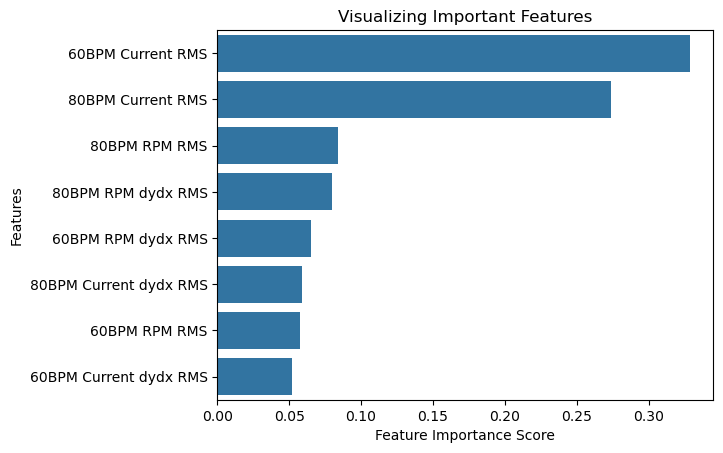

In [15]:
import seaborn as sns # statistical data visualization

# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph


In [16]:
#K nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

N_neighbors = 30
knn = KNeighborsClassifier(N_neighbors)
knn.fit(X_train,y_train)

print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.5317460317460317
0.48148148148148145


In [17]:
#Support Vector Machines
from sklearn.svm import SVC

svm = SVC(kernel='linear',C = 0.5, random_state= 101)
svm.fit(X_train,y_train)
print(svm.score(X_train,y_train))
print(svm.score(X_test,y_test))

0.6904761904761905
0.5925925925925926


In [18]:
#Multi Layer Perceptron
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(50), random_state=1)
clf.fit(X_train,y_train)

print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.5714285714285714
0.4444444444444444


C:\Users\skiang\AppData\Local\anaconda3\envs\SensingLVAD\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


BELOW HERE I AM TRYING NEURAL NETWORKS

In [19]:
'''import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import confusion_matrix, classification_report
device = "cuda" if torch.cuda.is_available() else "cpu"
device

# Split into train+val and test
X_trainvalPT, X_testPT, y_trainvalPT, y_testPT = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69)

# Split train into train-val
X_trainPT, X_valPT, y_trainPT, y_valPT = train_test_split(X_trainvalPT, y_trainvalPT, test_size=0.1, stratify=y_trainvalPT, random_state=21)


#normalize input

scaler = MinMaxScaler()
X_trainPT = scaler.fit_transform(X_trainPT)
X_valPT = scaler.transform(X_valPT)
X_testPT = scaler.transform(X_testPT)
X_trainPT, y_trainPT = np.array(X_trainPT), np.array(y_trainPT)
X_valPT, y_valPT = np.array(X_valPT), np.array(y_valPT)
X_testPT, y_testPT = np.array(X_testPT), np.array(y_testPT)'''

'import torch\nimport torch.nn as nn\nfrom sklearn.preprocessing import MinMaxScaler \nfrom sklearn.metrics import confusion_matrix, classification_report\ndevice = "cuda" if torch.cuda.is_available() else "cpu"\ndevice\n\n# Split into train+val and test\nX_trainvalPT, X_testPT, y_trainvalPT, y_testPT = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69)\n\n# Split train into train-val\nX_trainPT, X_valPT, y_trainPT, y_valPT = train_test_split(X_trainvalPT, y_trainvalPT, test_size=0.1, stratify=y_trainvalPT, random_state=21)\n\n\n#normalize input\n\nscaler = MinMaxScaler()\nX_trainPT = scaler.fit_transform(X_trainPT)\nX_valPT = scaler.transform(X_valPT)\nX_testPT = scaler.transform(X_testPT)\nX_trainPT, y_trainPT = np.array(X_trainPT), np.array(y_trainPT)\nX_valPT, y_valPT = np.array(X_valPT), np.array(y_valPT)\nX_testPT, y_testPT = np.array(X_testPT), np.array(y_testPT)'

In [20]:
'''class ClassifierDataset(Dataset):
    
    def __init__(self, X_dataPT, y_dataPT):
        self.X_dataPT = X_dataPT
        self.y_dataPT = y_dataPT
        
    def __getitem__(self, index):
        return self.X_dataPT[index], self.y_dataPT[index]
        
    def __len__ (self):
        return len(self.X_dataPT)


train_datasetPT = ClassifierDataset(torch.from_numpy(X_trainPT).float(), torch.from_numpy(y_trainPT).long())
val_datasetPT = ClassifierDataset(torch.from_numpy(X_valPT).float(), torch.from_numpy(y_valPT).long())
test_datasetPT = ClassifierDataset(torch.from_numpy(X_testPT).float(), torch.from_numpy(y_testPT).long())'''

'class ClassifierDataset(Dataset):\n    \n    def __init__(self, X_dataPT, y_dataPT):\n        self.X_dataPT = X_dataPT\n        self.y_dataPT = y_dataPT\n        \n    def __getitem__(self, index):\n        return self.X_dataPT[index], self.y_dataPT[index]\n        \n    def __len__ (self):\n        return len(self.X_dataPT)\n\n\ntrain_datasetPT = ClassifierDataset(torch.from_numpy(X_trainPT).float(), torch.from_numpy(y_trainPT).long())\nval_datasetPT = ClassifierDataset(torch.from_numpy(X_valPT).float(), torch.from_numpy(y_valPT).long())\ntest_datasetPT = ClassifierDataset(torch.from_numpy(X_testPT).float(), torch.from_numpy(y_testPT).long())'

In [21]:
'''target_list = []
for _, t in train_datasetPT:
    target_list.append(t)
    
target_list = torch.tensor(target_list)'''

'target_list = []\nfor _, t in train_datasetPT:\n    target_list.append(t)\n    \ntarget_list = torch.tensor(target_list)'